In [ ]:
# CELLULE 1 : Imports et Configuration
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random

# Configuration matplotlib
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

# Paths
DATA_PATH = Path("../data/raw/FaceForensics")
RESULTS_PATH = Path("../results")
RESULTS_PATH.mkdir(exist_ok=True)

# Catégories
CATEGORIES = ['real', 'actors', 'deepfakes', 'face2face', 'faceswap', 'neuraltextures']

print("✅ Configuration OK")
print(f"📁 Dataset path : {DATA_PATH}")
print(f"📊 Catégories : {CATEGORIES}")

✅ Configuration OK
📁 Dataset path : ..\data\raw\FaceForensics
📊 Catégories : ['real', 'actors', 'deepfakes', 'face2face', 'faceswap', 'neuraltextures']


In [3]:
# CELLULE 2 : Compter les Images
def count_images_per_category():
    """Compter le nombre d'images par catégorie"""
    counts = {}
    
    for category in CATEGORIES:
        category_path = DATA_PATH / category
        if category_path.exists():
            images = list(category_path.rglob('*.jpg'))
            counts[category] = len(images)
        else:
            counts[category] = 0
            print(f"⚠️  {category} : dossier introuvable")
    
    return counts

# Compter
image_counts = count_images_per_category()

# Afficher
print("\n📊 DISTRIBUTION DES IMAGES :")
print("="*50)
for cat, count in image_counts.items():
    percentage = (count / sum(image_counts.values())) * 100 if sum(image_counts.values()) > 0 else 0
    bar = '█' * int(percentage / 2)
    print(f"{cat:20s} : {count:>6,} images {bar} ({percentage:>5.1f}%)")

print("="*50)
print(f"✅ TOTAL : {sum(image_counts.values()):,} images")


📊 DISTRIBUTION DES IMAGES :
real                 :  1,979 images ███████ ( 15.4%)
actors               :  3,828 images ██████████████ ( 29.7%)
deepfakes            :  1,979 images ███████ ( 15.4%)
face2face            :  1,979 images ███████ ( 15.4%)
faceswap             :  1,552 images ██████ ( 12.1%)
neuraltextures       :  1,552 images ██████ ( 12.1%)
✅ TOTAL : 12,869 images


✅ Graphique sauvegardé : results/distribution_categories.png


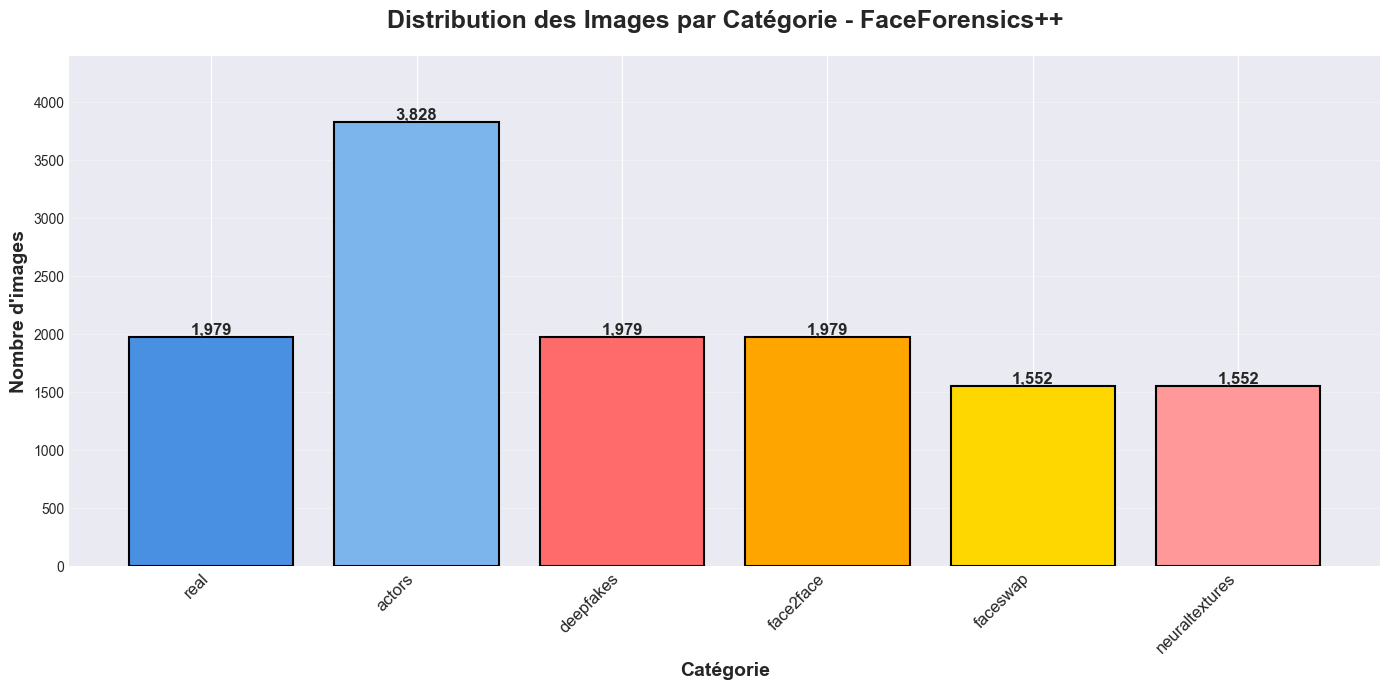

In [4]:
# CELLULE 3 : Graphique de Distribution
fig, ax = plt.subplots(figsize=(14, 7))

categories = list(image_counts.keys())
counts = list(image_counts.values())
colors = ['#4A90E2', '#7CB5EC', '#FF6B6B', '#FFA500', '#FFD700', '#FF9999']

bars = ax.bar(categories, counts, color=colors, edgecolor='black', linewidth=1.5)

# Ajouter les valeurs sur les barres
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_title('Distribution des Images par Catégorie - FaceForensics++', 
             fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Catégorie', fontsize=14, fontweight='bold')
ax.set_ylabel('Nombre d\'images', fontsize=14, fontweight='bold')
ax.set_ylim(0, max(counts) * 1.15)
ax.grid(axis='y', alpha=0.3)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()

# Sauvegarder
plt.savefig(RESULTS_PATH / 'distribution_categories.png', dpi=150, bbox_inches='tight')
print("✅ Graphique sauvegardé : results/distribution_categories.png")
plt.show()

✅ Grille d'échantillons sauvegardée : results/samples_grid.png


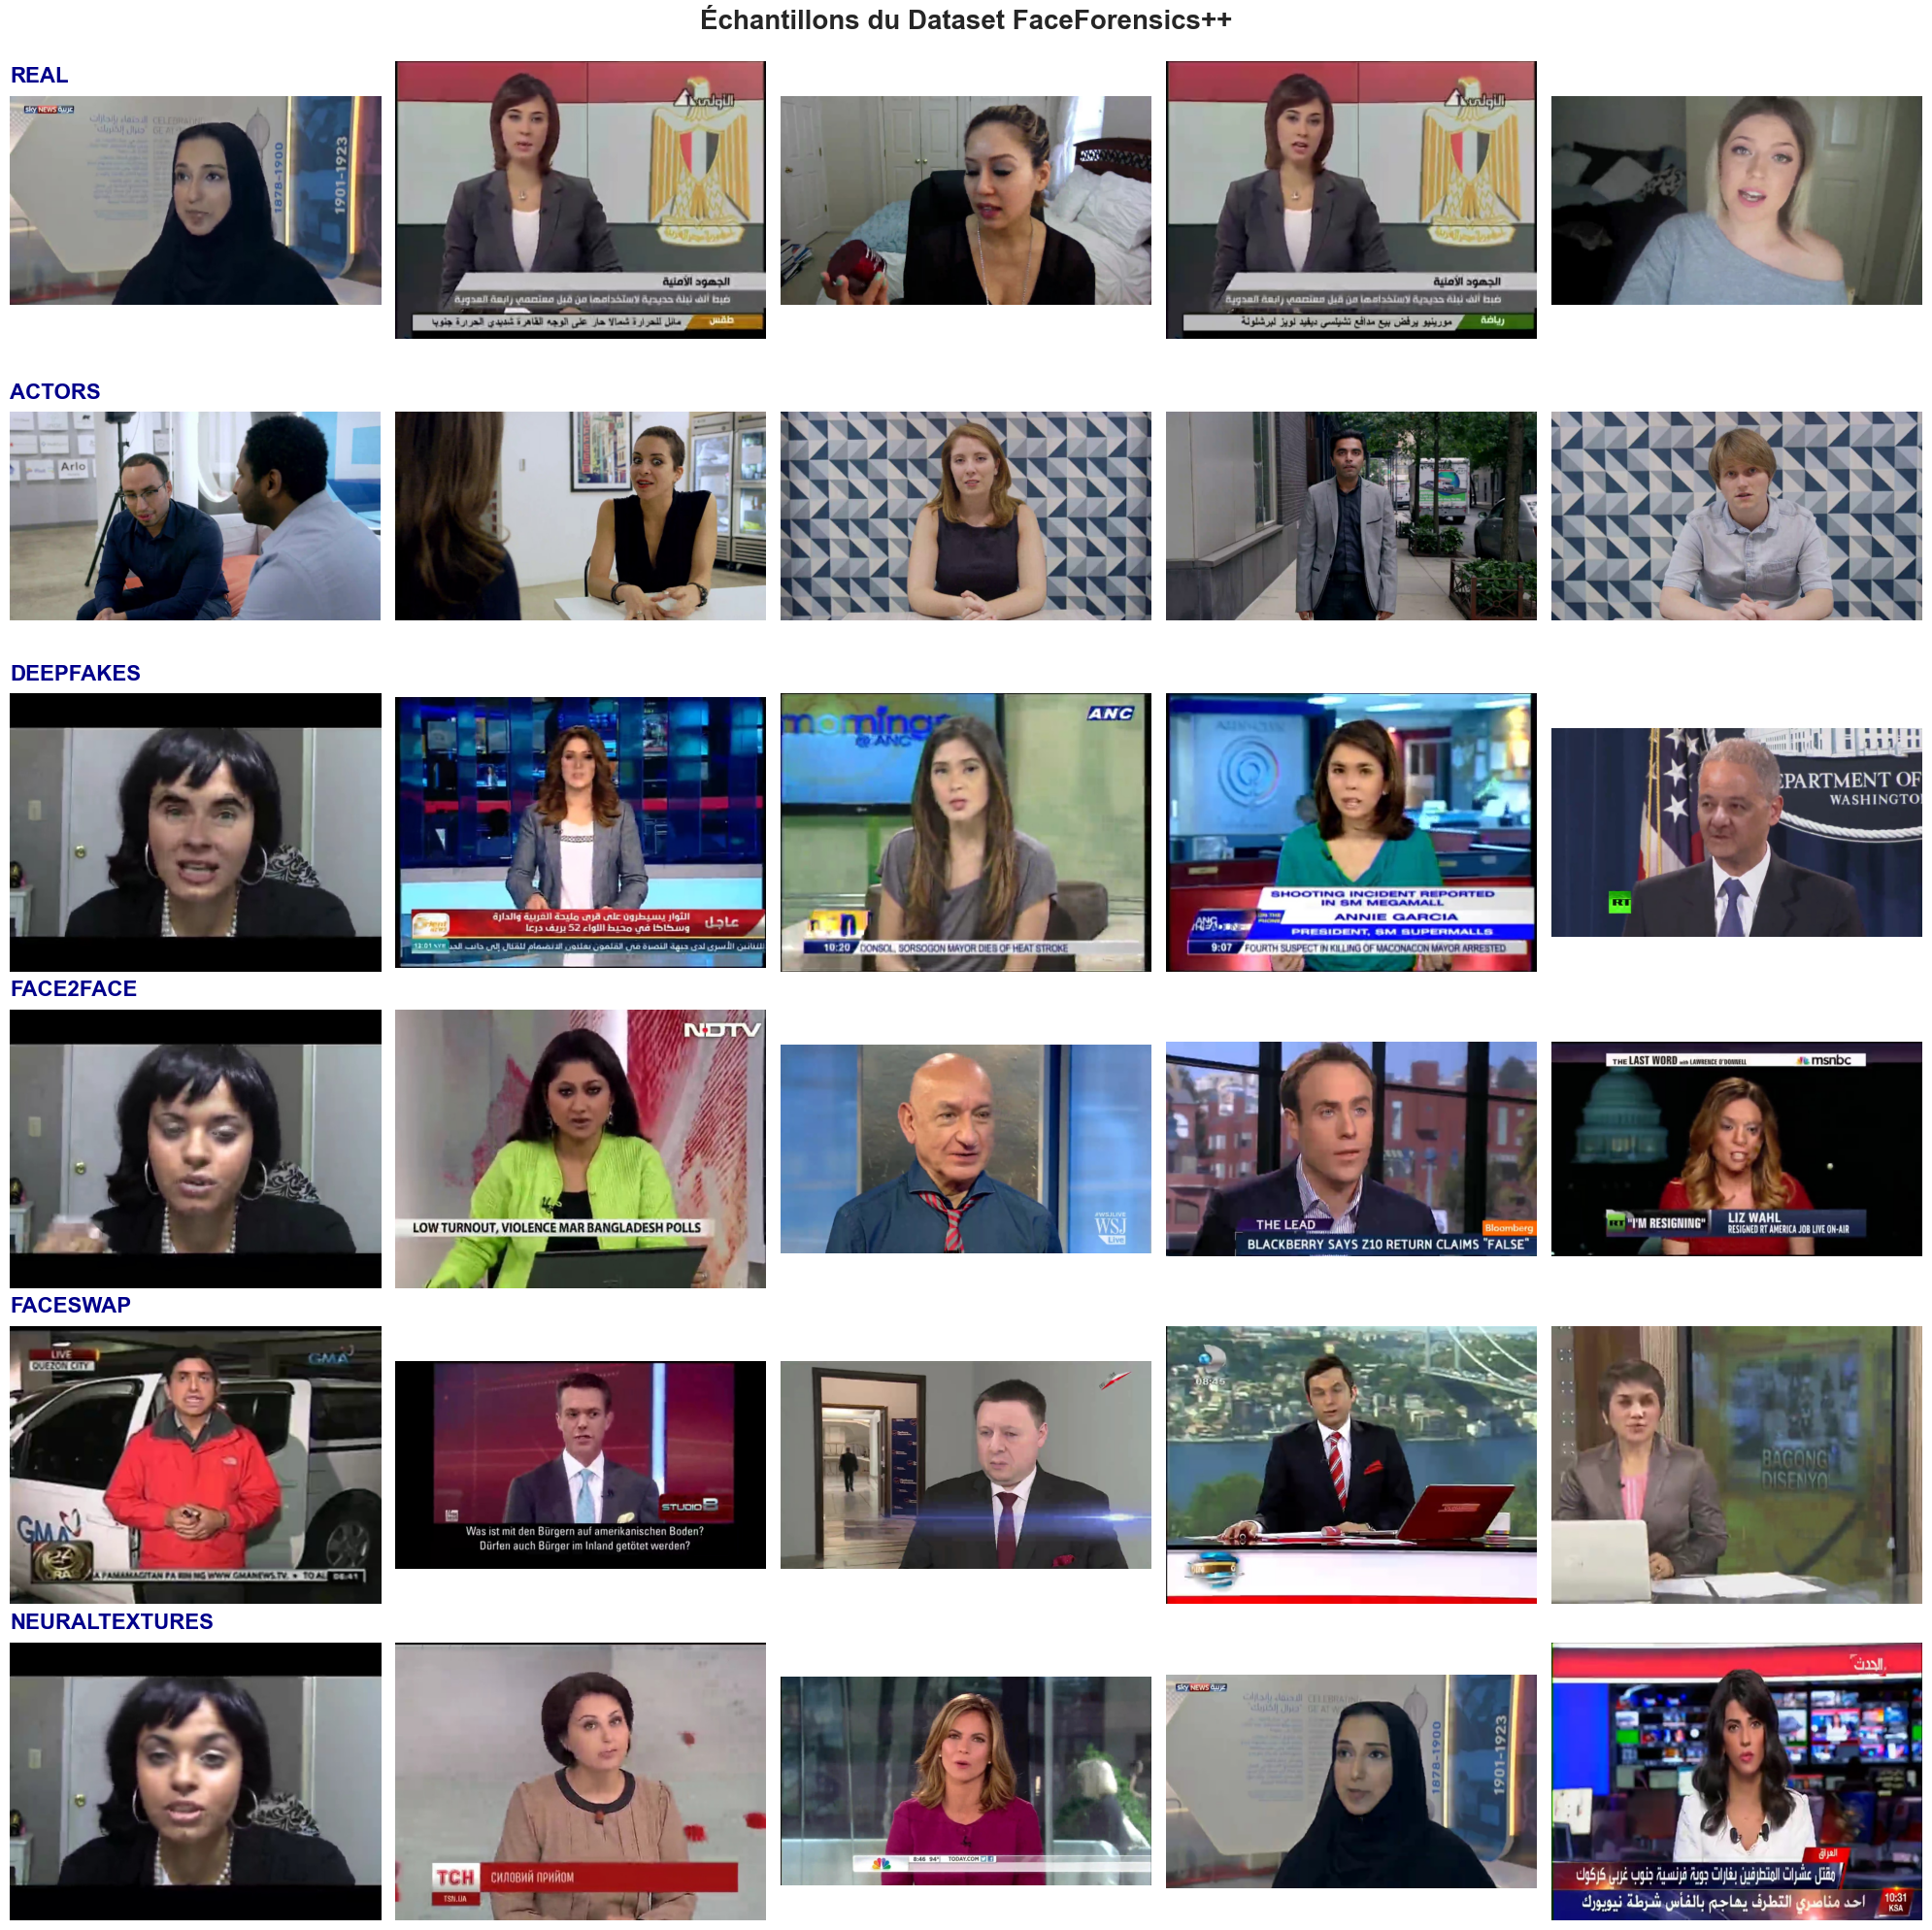

In [5]:
# CELLULE 4 : Grille d'Échantillons
def plot_sample_grid(num_samples=5):
    """Afficher une grille d'échantillons"""
    
    fig, axes = plt.subplots(len(CATEGORIES), num_samples, figsize=(20, 20))
    fig.suptitle('Échantillons du Dataset FaceForensics++', 
                 fontsize=20, fontweight='bold', y=0.995)
    
    for i, category in enumerate(CATEGORIES):
        category_path = DATA_PATH / category
        all_images = list(category_path.rglob('*.jpg'))
        
        if len(all_images) == 0:
            print(f"⚠️  {category} : aucune image trouvée")
            continue
        
        if len(all_images) < num_samples:
            print(f"⚠️  {category} : seulement {len(all_images)} images disponibles")
            samples = all_images
        else:
            samples = random.sample(all_images, num_samples)
        
        for j, img_path in enumerate(samples):
            try:
                img = Image.open(img_path)
                axes[i, j].imshow(img)
                axes[i, j].axis('off')
                
                # Titre sur la première colonne
                if j == 0:
                    axes[i, j].set_title(category.upper(), 
                                        fontsize=16, 
                                        fontweight='bold', 
                                        loc='left',
                                        pad=10,
                                        color='darkblue')
            except Exception as e:
                print(f"❌ Erreur lecture {img_path.name}: {e}")
                axes[i, j].axis('off')
    
    plt.tight_layout()
    plt.savefig(RESULTS_PATH / 'samples_grid.png', dpi=150, bbox_inches='tight')
    print("✅ Grille d'échantillons sauvegardée : results/samples_grid.png")
    plt.show()

# Afficher
plot_sample_grid(num_samples=5)

In [6]:
# CELLULE 5 : Analyse des Résolutions
def analyze_image_sizes(category, sample_size=100):
    """Analyser les tailles d'images"""
    category_path = DATA_PATH / category
    all_images = list(category_path.rglob('*.jpg'))
    
    if len(all_images) == 0:
        return None, None, None
    
    # Échantillonner
    sample_images = random.sample(all_images, min(sample_size, len(all_images)))
    
    widths = []
    heights = []
    sizes_kb = []
    
    for img_path in sample_images:
        try:
            img = Image.open(img_path)
            w, h = img.size
            widths.append(w)
            heights.append(h)
            
            # Taille du fichier
            size_kb = img_path.stat().st_size / 1024
            sizes_kb.append(size_kb)
        except:
            continue
    
    return widths, heights, sizes_kb

# Analyser toutes les catégories
print("\n📐 ANALYSE DES RÉSOLUTIONS (100 échantillons par catégorie)")
print("="*80)

resolution_data = []

for category in CATEGORIES:
    widths, heights, sizes = analyze_image_sizes(category)
    
    if widths:
        avg_w = np.mean(widths)
        avg_h = np.mean(heights)
        avg_size = np.mean(sizes)
        
        resolution_data.append({
            'Catégorie': category,
            'Largeur (px)': f"{avg_w:.0f}",
            'Hauteur (px)': f"{avg_h:.0f}",
            'Résolution': f"{avg_w:.0f} × {avg_h:.0f}",
            'Taille (KB)': f"{avg_size:.1f}"
        })
        
        print(f"{category:20s} : {avg_w:>6.0f} × {avg_h:<6.0f} px  |  {avg_size:>6.1f} KB")

# DataFrame
df_resolutions = pd.DataFrame(resolution_data)
print("\n")
print(df_resolutions.to_string(index=False))
print("="*80)


📐 ANALYSE DES RÉSOLUTIONS (100 échantillons par catégorie)
real                 :    940 × 590    px  |   111.7 KB
actors               :   1920 × 1080   px  |   304.0 KB
deepfakes            :    982 × 611    px  |   112.9 KB
face2face            :    874 × 566    px  |   102.5 KB
faceswap             :    941 × 595    px  |   112.4 KB
neuraltextures       :    953 × 602    px  |   113.0 KB


     Catégorie Largeur (px) Hauteur (px)  Résolution Taille (KB)
          real          940          590   940 × 590       111.7
        actors         1920         1080 1920 × 1080       304.0
     deepfakes          982          611   982 × 611       112.9
     face2face          874          566   874 × 566       102.5
      faceswap          941          595   941 × 595       112.4
neuraltextures          953          602   953 × 602       113.0


In [7]:
# CELLULE 6 : DataFrame Résumé
# Créer un DataFrame complet
summary_data = []

for category in CATEGORIES:
    summary_data.append({
        'Catégorie': category,
        'Nombre d\'images': image_counts.get(category, 0),
        'Pourcentage': f"{(image_counts.get(category, 0) / sum(image_counts.values()) * 100):.1f}%"
    })

df_summary = pd.DataFrame(summary_data)

print("\n📋 RÉSUMÉ DU DATASET")
print("="*60)
print(df_summary.to_string(index=False))
print("="*60)
print(f"\nTOTAL : {sum(image_counts.values()):,} images")

# Sauvegarder en CSV
df_summary.to_csv(RESULTS_PATH / 'dataset_summary.csv', index=False)
print("\n✅ Résumé sauvegardé : results/dataset_summary.csv")



📋 RÉSUMÉ DU DATASET
     Catégorie  Nombre d'images Pourcentage
          real             1979       15.4%
        actors             3828       29.7%
     deepfakes             1979       15.4%
     face2face             1979       15.4%
      faceswap             1552       12.1%
neuraltextures             1552       12.1%

TOTAL : 12,869 images

✅ Résumé sauvegardé : results/dataset_summary.csv
